In [83]:
# HCAHPS Survey Analysis (Corrected and Complete Version)

# --------------------------------
# Step 1: Import Libraries
# --------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For clean plots
sns.set(style="whitegrid")

# --------------------------------
# Step 2: Load and Merge Data Properly
# --------------------------------
# Correct GitHub raw base
github_base = "https://raw.githubusercontent.com/baheldeepti/Maven-Healthcare-Challenge-HCAHPS-dataset/main/data/"

# Files to load
files = {
    "state_results": "state_results.csv",
    "national_results": "national_results.csv",
    "measures": "measures.csv",
    "questions": "questions.csv",
    "responses": "responses.csv",
    "reports": "reports.csv",
    "states": "states.csv"
}

# Load datasets
datasets = {name: pd.read_csv(github_base + filename) for name, filename in files.items()}


state_results_df = datasets['state_results']
national_results_df = datasets['national_results']
measures_df = datasets['measures']
questions_df = datasets['questions']
responses_df = datasets['responses']
reports_df = datasets['reports']
states_df = datasets['states']

# Convert Response Rate from string to float (if necessary)
responses_df['Response Rate (%)'] = pd.to_numeric(responses_df['Response Rate (%)'], errors='coerce')

# Parse year from 'Release Period'
state_results_df['Year'] = state_results_df['Release Period'].str[-4:].astype(int)
national_results_df['Year'] = national_results_df['Release Period'].str[-4:].astype(int)

# Parse year from 'Release Period'
state_results_df['Year'] = state_results_df['Release Period'].str[-4:].astype(int)
national_results_df['Year'] = national_results_df['Release Period'].str[-4:].astype(int)
responses_df['Year'] = responses_df['Release Period'].str[-4:].astype(int)

# Merge Measures and Questions correctly
measures_questions = pd.merge(measures_df, questions_df, on='Measure ID', how='left')

state_results_df = pd.merge(state_results_df, measures_questions[['Measure ID', 'Measure', 'Question']], on='Measure ID', how='left')
national_results_df = pd.merge(national_results_df, measures_questions[['Measure ID', 'Measure', 'Question']], on='Measure ID', how='left')

# Merge State Names
state_results_df = pd.merge(state_results_df, states_df[['State', 'State Name']], on='State', how='left')
responses_df = pd.merge(responses_df, states_df[['State', 'State Name']], on='State', how='left')



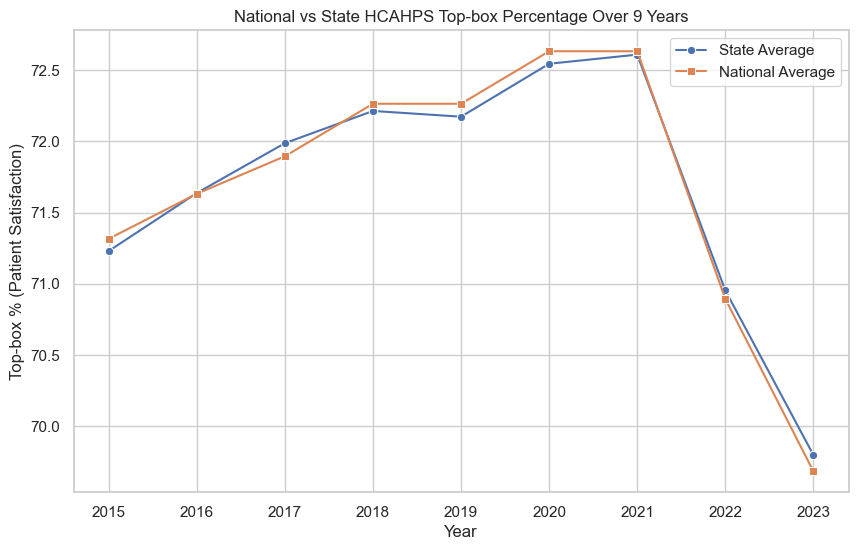

In [27]:
# Merge states for full state names 
state_results_df = pd.merge(state_results_df, states_df[['State', 'State Name']], on='State', how='left')

# --------------------------------
# Step 3: Trend Analysis (9 Years)
# --------------------------------
state_overall = state_results_df.groupby('Year')['Top-box Percentage'].mean().reset_index()
national_overall = national_results_df.groupby('Year')['Top-box Percentage'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=state_overall, x='Year', y='Top-box Percentage', marker='o', label='State Average')
sns.lineplot(data=national_overall, x='Year', y='Top-box Percentage', marker='s', label='National Average')
plt.title('National vs State HCAHPS Top-box Percentage Over 9 Years')
plt.ylabel('Top-box % (Patient Satisfaction)')
plt.xlabel('Year')
plt.legend()
plt.show()


C:\Users\17654\AppData\Local\Temp\ipykernel_36940\1257704741.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




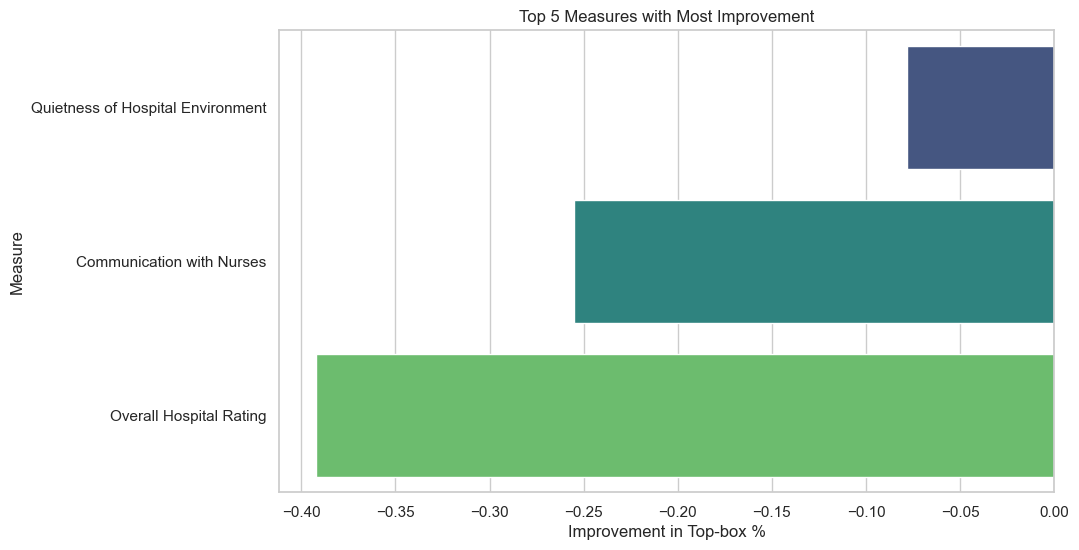

In [11]:

# --------------------------------
# Step 4: Measure-wise Progress
# --------------------------------
measure_progress = state_results_df.groupby(['Measure', 'Question', 'Year'])['Top-box Percentage'].mean().reset_index()

pivot_progress = measure_progress.pivot_table(index=['Measure', 'Question'], columns='Year', values='Top-box Percentage')
pivot_progress['Improvement'] = pivot_progress[pivot_progress.columns[-1]] - pivot_progress[pivot_progress.columns[0]]

top_improvements = pivot_progress.sort_values('Improvement', ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_improvements.head(5), x='Improvement', y='Measure', palette='viridis')
plt.title('Top 5 Measures with Most Improvement')
plt.xlabel('Improvement in Top-box %')
plt.ylabel('Measure')
plt.show()


C:\Users\17654\AppData\Local\Temp\ipykernel_36940\4254128222.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




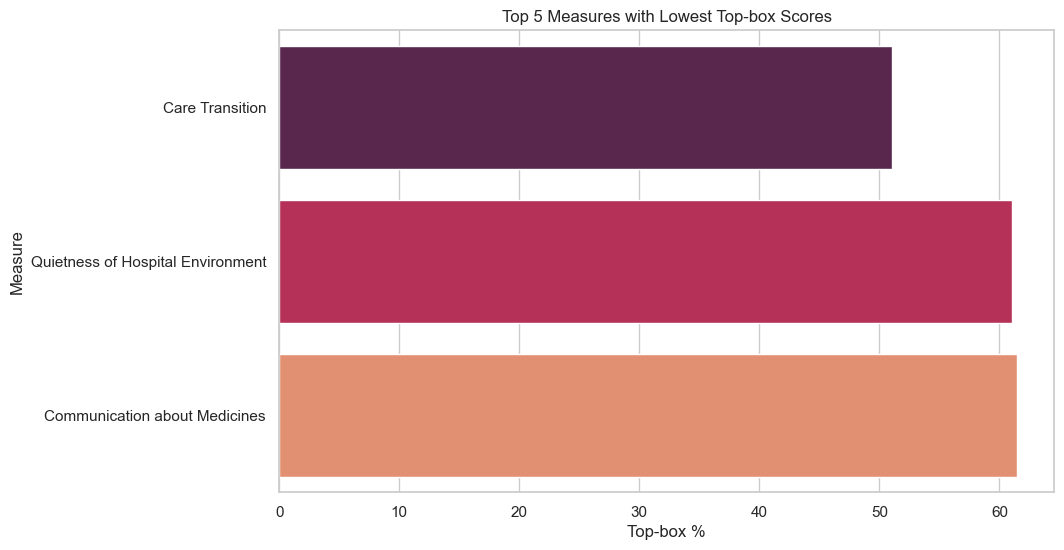

In [29]:

# --------------------------------
# Step 5: Measure-wise Opportunities
# --------------------------------
latest_year = state_results_df['Year'].max()
latest_scores = state_results_df[state_results_df['Year'] == latest_year]

low_performing_measures = latest_scores.groupby(['Measure', 'Question'])['Top-box Percentage'].mean().sort_values().head(5).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=low_performing_measures, x='Top-box Percentage', y='Measure', palette='rocket')
plt.title('Top 5 Measures with Lowest Top-box Scores')
plt.xlabel('Top-box %')
plt.ylabel('Measure')
plt.show()


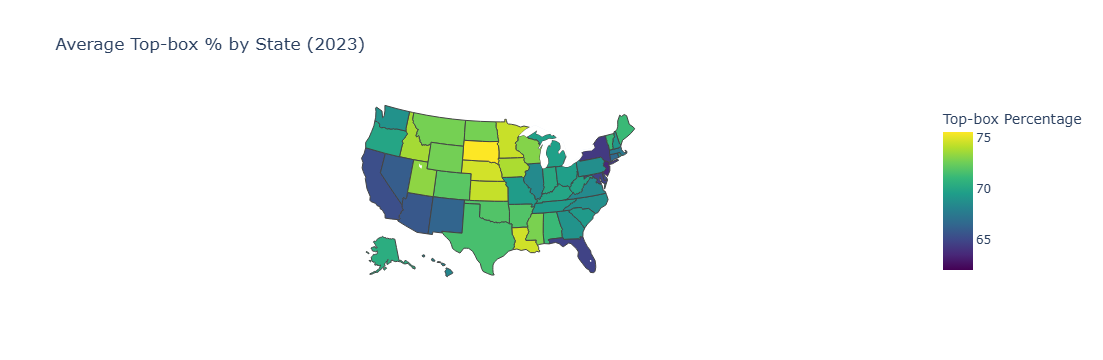

In [35]:

# --------------------------------
# Step 6: State Performance Map
# --------------------------------
latest_state_scores = state_results_df[state_results_df['Year'] == latest_year]
state_avg_latest = latest_state_scores.groupby('State')['Top-box Percentage'].mean().reset_index()

fig = px.choropleth(
    state_avg_latest,
    locations='State',
    locationmode="USA-states",
    color='Top-box Percentage',
    color_continuous_scale="Viridis",
    scope="usa",
    title=f"Average Top-box % by State ({latest_year})"
)
fig.show()


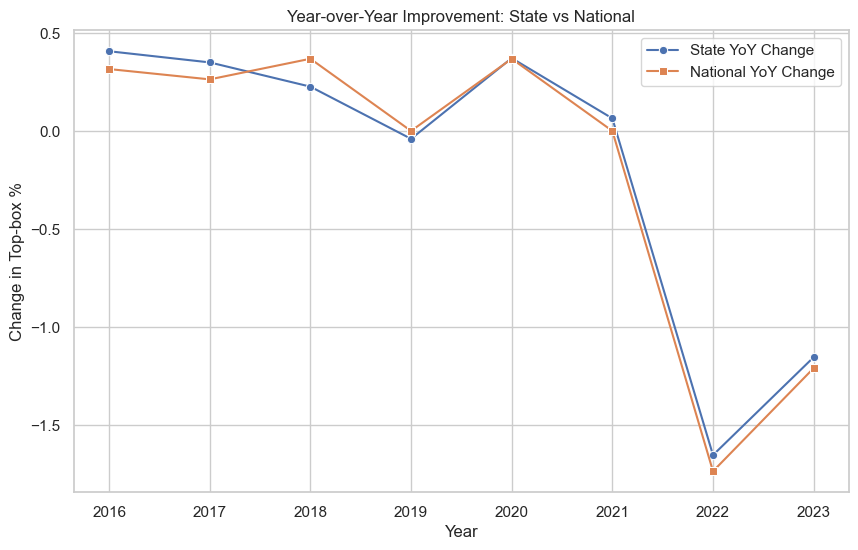

In [37]:

# --------------------------------
# Step 9: Year-over-Year National vs State Delta
# --------------------------------
national_overall['Delta'] = national_overall['Top-box Percentage'].diff()
state_overall['Delta'] = state_overall['Top-box Percentage'].diff()

plt.figure(figsize=(10,6))
sns.lineplot(data=state_overall, x='Year', y='Delta', marker='o', label='State YoY Change')
sns.lineplot(data=national_overall, x='Year', y='Delta', marker='s', label='National YoY Change')
plt.title('Year-over-Year Improvement: State vs National')
plt.ylabel('Change in Top-box %')
plt.xlabel('Year')
plt.legend()
plt.show()

C:\Users\17654\AppData\Local\Temp\ipykernel_36940\2459900286.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




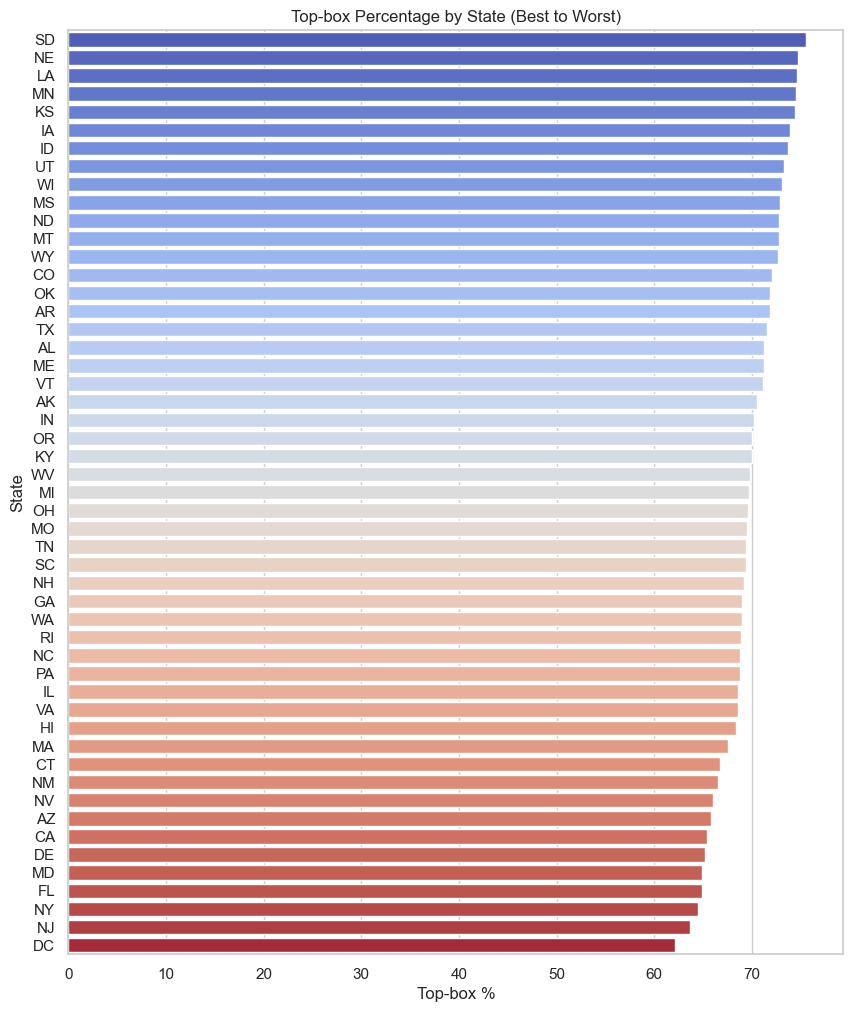

In [23]:
# --------------------------------
# Step 10: State Level Outliers (Best and Worst States)
# --------------------------------
latest_state_scores.head()
state_latest_avg = latest_state_scores.groupby(['State'])['Top-box Percentage'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,12))
sns.barplot(data=state_latest_avg, x='Top-box Percentage', y='State', palette='coolwarm')
plt.title('Top-box Percentage by State (Best to Worst)')
plt.xlabel('Top-box %')
plt.ylabel('State')
plt.show()


C:\Users\17654\AppData\Local\Temp\ipykernel_36940\2782339858.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




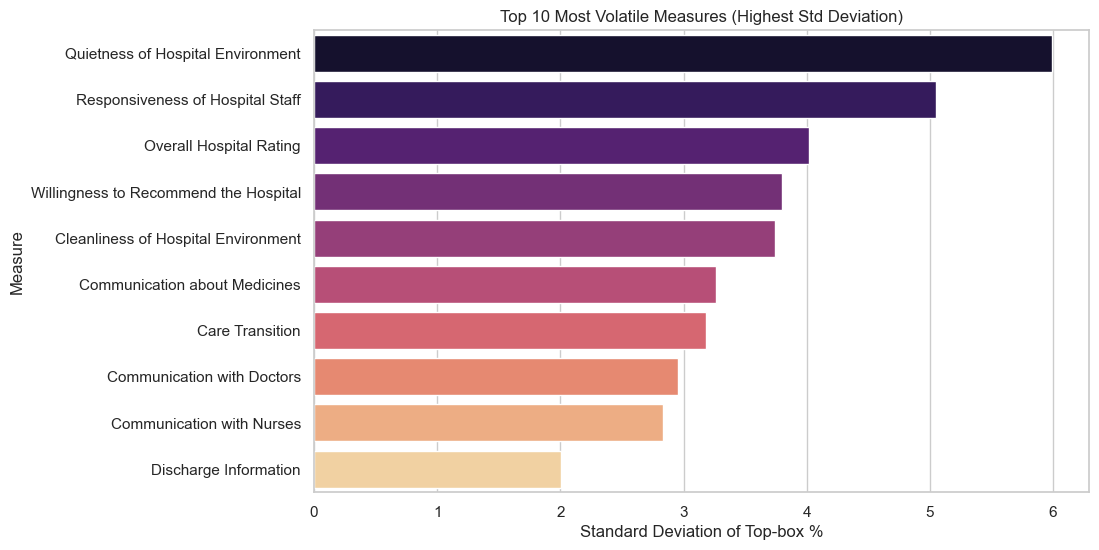

In [45]:
# --------------------------------
# Step 11: Measure Stability vs Volatility
# --------------------------------
measure_std_dev = state_results_df.groupby(['Measure'])['Top-box Percentage'].std().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=measure_std_dev.head(10), x='Top-box Percentage', y='Measure', palette='magma')
plt.title('Top 10 Most Volatile Measures (Highest Std Deviation)')
plt.xlabel('Standard Deviation of Top-box %')
plt.ylabel('Measure')
plt.show()



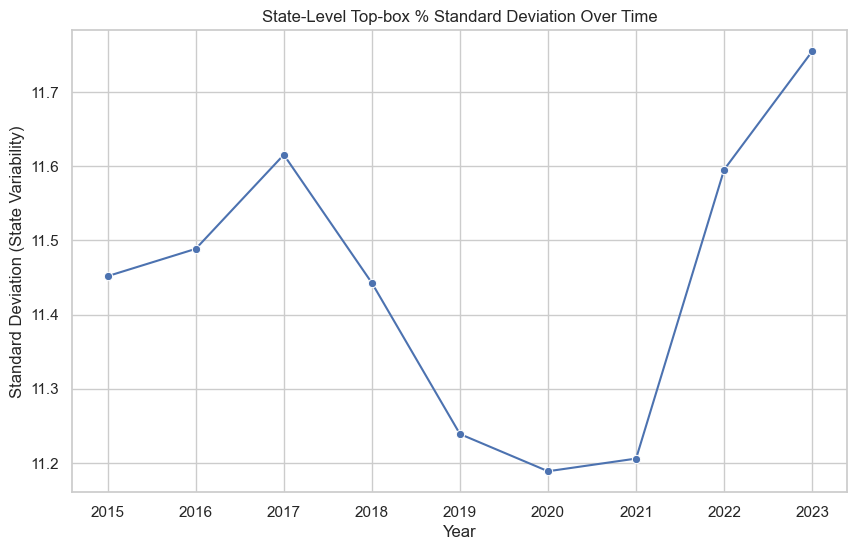

In [47]:

# --------------------------------
# Step 12: Equity Analysis (Variation Across States)
# --------------------------------
state_variation = state_results_df.groupby('Year').agg({'Top-box Percentage':'std'}).reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=state_variation, x='Year', y='Top-box Percentage', marker='o')
plt.title('State-Level Top-box % Standard Deviation Over Time')
plt.ylabel('Standard Deviation (State Variability)')
plt.xlabel('Year')
plt.show()


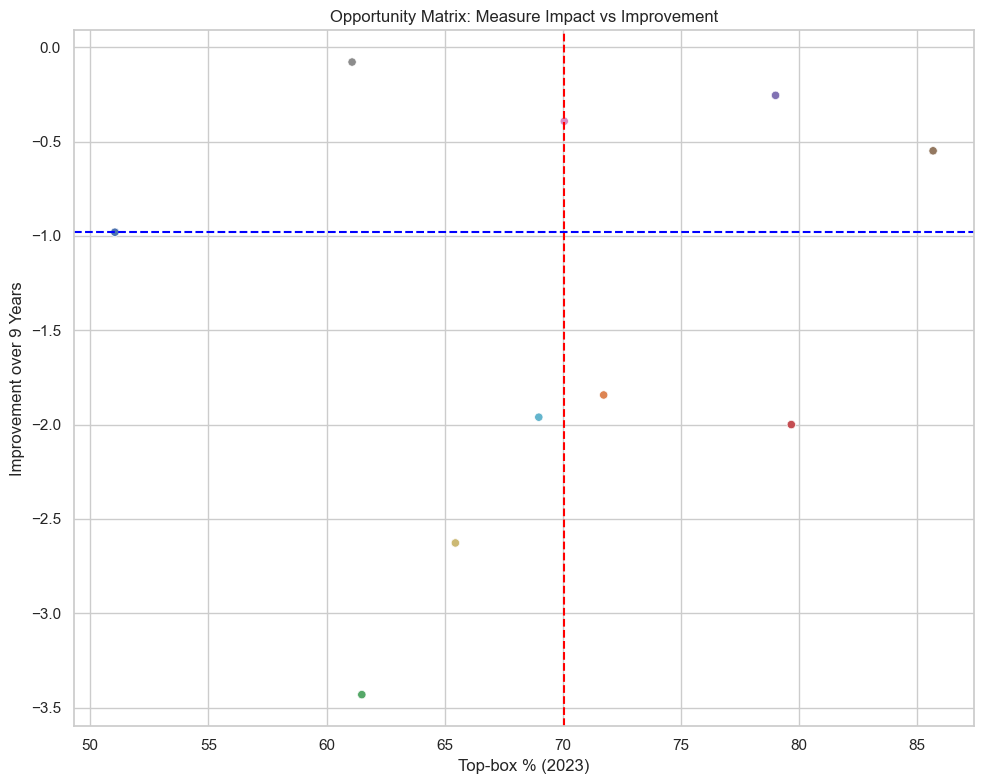

In [61]:
# --------------------------------
# Step 13: Opportunity Matrix (Impact vs Improvement)
# --------------------------------

# 1. Filter only year columns from pivot_progress
year_columns = [col for col in pivot_progress.columns if isinstance(col, int)]

# 2. Safeguard: Check if we have at least two years of data
if len(year_columns) >= 2:
    latest_year_col = max(year_columns)

    # 3. Reconstruct impact_matrix cleanly
    impact_matrix = pivot_progress.reset_index()

    # Drop rows with missing data in key columns
    impact_matrix = impact_matrix.dropna(subset=[latest_year_col, 'Improvement', 'Measure'])

    # 4. Create 'Latest Score' column
    impact_matrix['Latest Score'] = impact_matrix[latest_year_col]

    # 5. Plot safely
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        data=impact_matrix,
        x='Latest Score',
        y='Improvement',
        hue='Measure',
        legend=False  # Optional: hide legend if too cluttered
    )
    plt.axvline(impact_matrix['Latest Score'].median(), color='red', linestyle='--')
    plt.axhline(impact_matrix['Improvement'].median(), color='blue', linestyle='--')
    plt.title('Opportunity Matrix: Measure Impact vs Improvement')
    plt.xlabel(f'Top-box % ({latest_year_col})')
    plt.ylabel('Improvement over 9 Years')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough year columns available to compute Opportunity Matrix.")


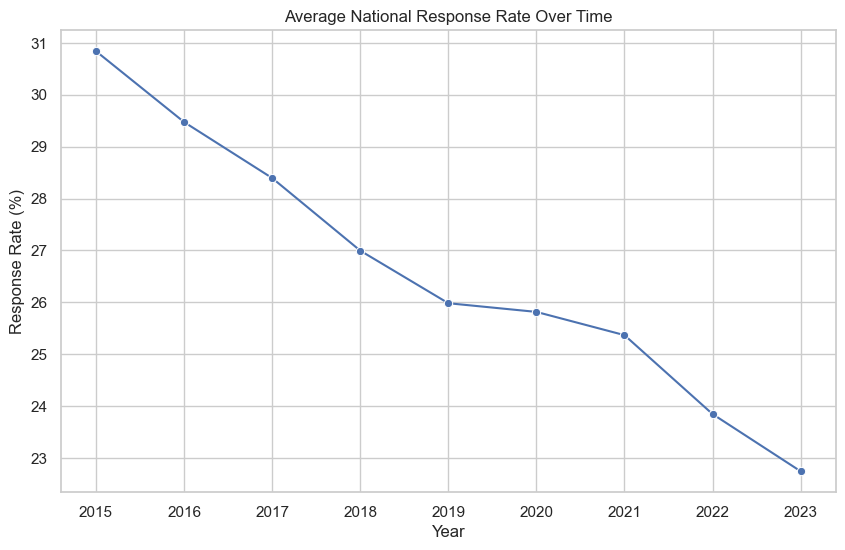

In [85]:
# --------------------------------
# Step 1: National Survey Response Rate Trend
# --------------------------------
response_rate_by_year = responses_df.groupby('Year')['Response Rate (%)'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=response_rate_by_year, x='Year', y='Response Rate (%)', marker='o')
plt.title('Average National Response Rate Over Time')
plt.ylabel('Response Rate (%)')
plt.xlabel('Year')
plt.show()

C:\Users\17654\AppData\Local\Temp\ipykernel_36940\2964713087.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




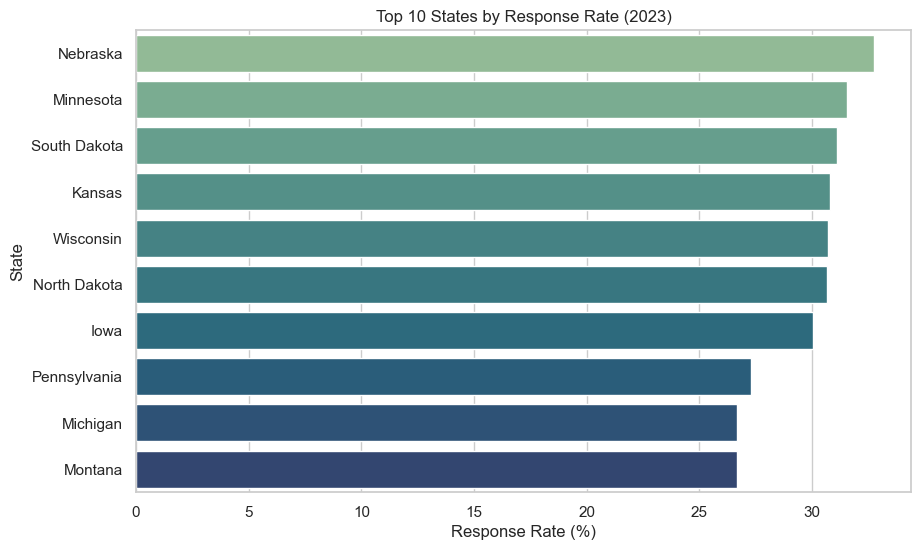

In [87]:

# --------------------------------
# Step 2: Top 10 States by Survey Response Rate (Latest Year)
# --------------------------------
latest_year = responses_df['Year'].max()
latest_response = responses_df[responses_df['Year'] == latest_year].dropna(subset=['Response Rate (%)'])
latest_response_rates = latest_response.groupby('State Name', as_index=False)['Response Rate (%)'].mean()
latest_response_rates = latest_response_rates.sort_values(by='Response Rate (%)', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=latest_response_rates, x='Response Rate (%)', y='State Name', palette='crest')
plt.title(f'Top 10 States by Response Rate ({latest_year})')
plt.xlabel('Response Rate (%)')
plt.ylabel('State')
plt.show()


In [91]:
# --------------------------------
# Step 3: Correlation - Response Rate vs Top-box Percentage
# --------------------------------
merged_rates = pd.merge(
    state_results_df,
    responses_df[['Release Period', 'State', 'Response Rate (%)']],
    on=['Release Period', 'State'],
    how='left'
)

merged_rates_clean = merged_rates.dropna(subset=['Top-box Percentage', 'Response Rate (%)'])
correlation = merged_rates_clean['Top-box Percentage'].corr(merged_rates_clean['Response Rate (%)'])
print(f"\nCorrelation between Response Rate and Top-box %: {correlation:.2f}")



Correlation between Response Rate and Top-box %: 0.07


In [93]:
# Step 4: Answer Box Structure Example
# --------------------------------
question_box_structure = questions_df[['Measure ID', 'Question', 'Bottom-box Answer', 'Middle-box Answer', 'Top-box Answer']]
sample = question_box_structure.sample(1).iloc[0]

print("\nSample Question Answer Mapping:")
print(f"Question: {sample['Question']}")
print(f"Top-box Answer: {sample['Top-box Answer']}")
print(f"Middle-box Answer: {sample['Middle-box Answer']}")
print(f"Bottom-box Answer: {sample['Bottom-box Answer']}")



Sample Question Answer Mapping:
Question: Before giving you any new medicine, how often did hospital staff tell you what the medicine was for? 
Top-box Answer: Always
Middle-box Answer: Usually
Bottom-box Answer: Sometimes or never


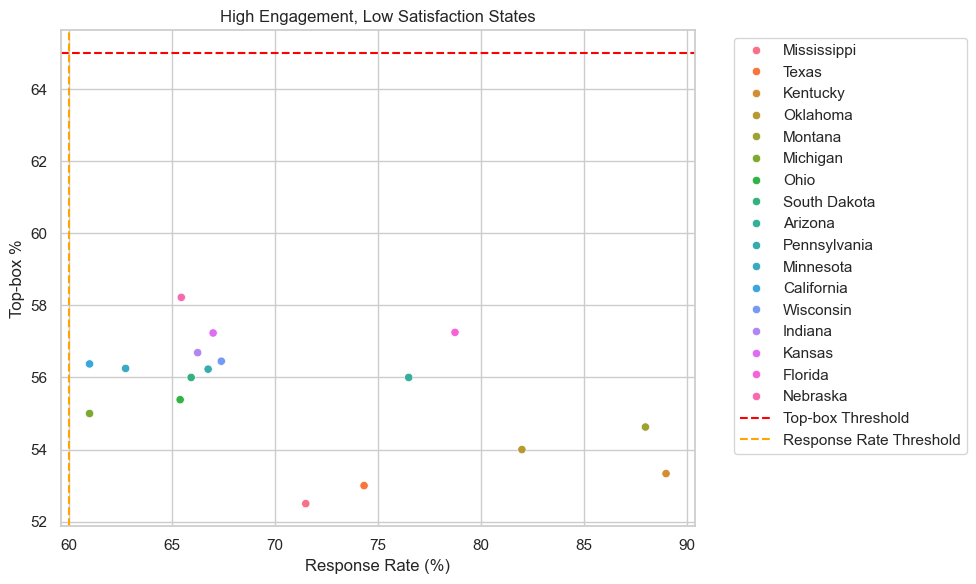

In [95]:
# Step 5: Underperforming States with High Response Rates
high_response = merged_rates_clean[merged_rates_clean['Response Rate (%)'] > 60]
underperforming = high_response[high_response['Top-box Percentage'] < 65]

under_state_avg = underperforming.groupby('State Name', as_index=False)[['Top-box Percentage', 'Response Rate (%)']].mean()
under_state_avg = under_state_avg.sort_values(by='Top-box Percentage')

plt.figure(figsize=(10,6))
sns.scatterplot(data=under_state_avg, x='Response Rate (%)', y='Top-box Percentage', hue='State Name')
plt.axhline(y=65, color='red', linestyle='--', label='Top-box Threshold')
plt.axvline(x=60, color='orange', linestyle='--', label='Response Rate Threshold')
plt.title('High Engagement, Low Satisfaction States')
plt.xlabel('Response Rate (%)')
plt.ylabel('Top-box %')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\17654\AppData\Local\Temp\ipykernel_36940\1134905679.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




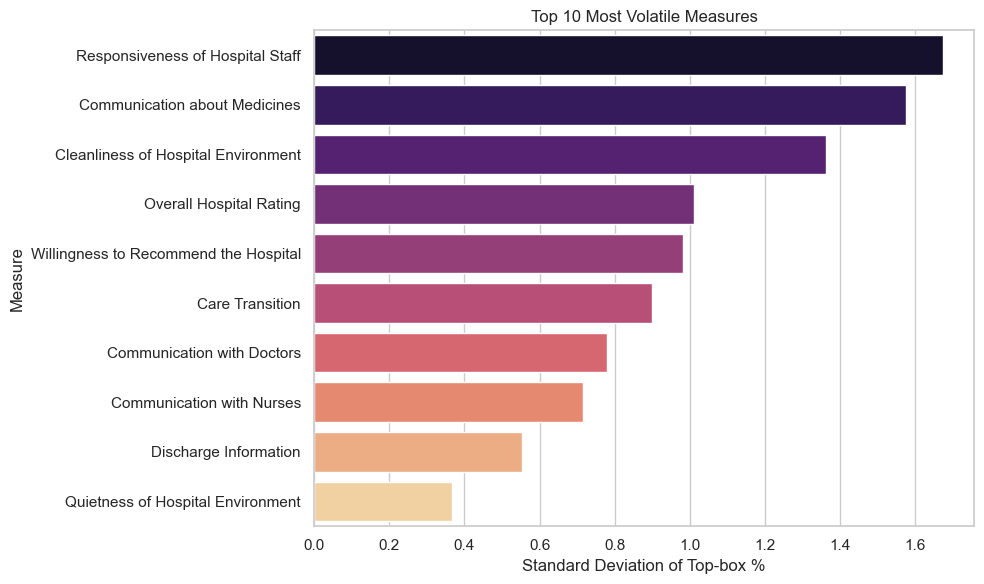

In [97]:
# Step 6: Volatility of Measures Over Years
measure_volatility = state_results_df.groupby(['Measure', 'Year'])['Top-box Percentage'].mean().reset_index()
volatility = measure_volatility.groupby('Measure')['Top-box Percentage'].std().reset_index()
volatility.columns = ['Measure', 'Std Dev']
volatility_sorted = volatility.sort_values(by='Std Dev', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=volatility_sorted.head(10), y='Measure', x='Std Dev', palette='magma')
plt.title('Top 10 Most Volatile Measures')
plt.xlabel('Standard Deviation of Top-box %')
plt.ylabel('Measure')
plt.tight_layout()
plt.show()


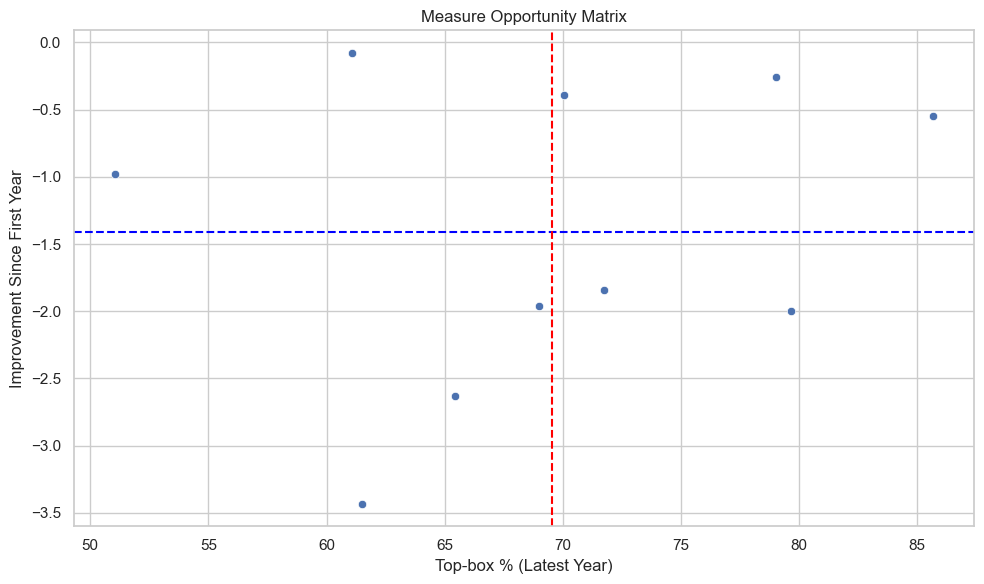

In [99]:
# Step 7: Improvement vs Satisfaction Matrix
measure_year_avg = state_results_df.groupby(['Measure', 'Year'])['Top-box Percentage'].mean().reset_index()
pivot_measures = measure_year_avg.pivot(index='Measure', columns='Year', values='Top-box Percentage')
pivot_measures['Improvement'] = pivot_measures[latest_year] - pivot_measures[min(pivot_measures.columns)]
pivot_measures['Latest'] = pivot_measures[latest_year]
pivot_measures = pivot_measures.dropna()

plt.figure(figsize=(10,6))
sns.scatterplot(data=pivot_measures, x='Latest', y='Improvement')
plt.axhline(pivot_measures['Improvement'].median(), color='blue', linestyle='--')
plt.axvline(pivot_measures['Latest'].median(), color='red', linestyle='--')
plt.title('Measure Opportunity Matrix')
plt.xlabel('Top-box % (Latest Year)')
plt.ylabel('Improvement Since First Year')
plt.tight_layout()
plt.show()


C:\Users\17654\AppData\Local\Temp\ipykernel_36940\1170094256.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\17654\AppData\Local\Temp\ipykernel_36940\1170094256.py:14: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



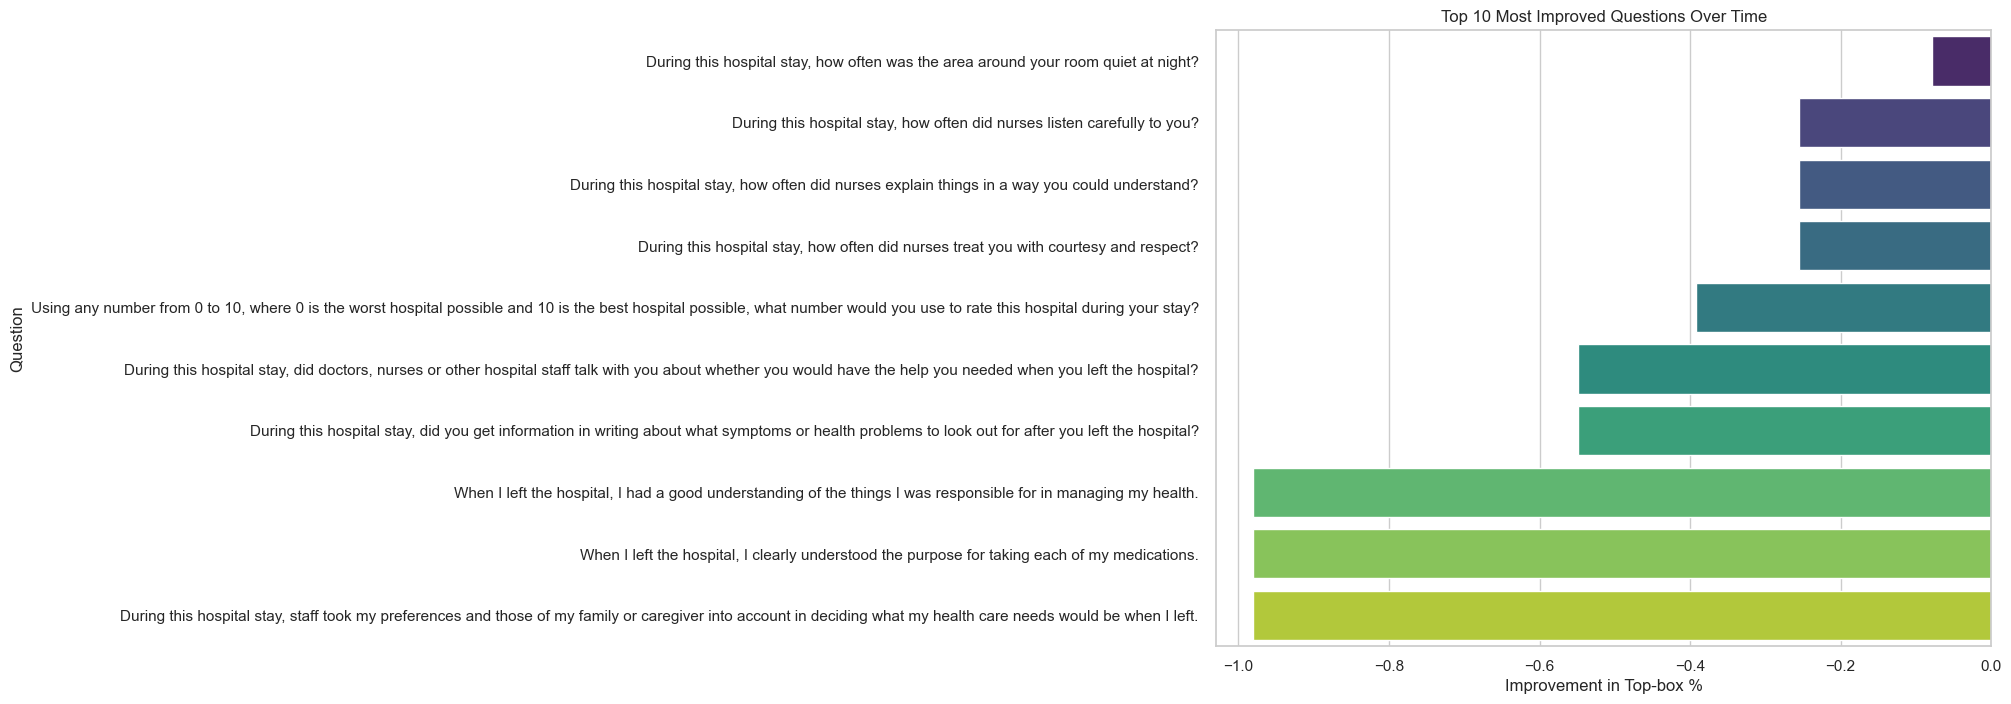

In [101]:

# --------------------------------
# Step 5: Question-level Improvement Analysis
# --------------------------------
question_yearly = state_results_df.groupby(['Question', 'Year'])['Top-box Percentage'].mean().reset_index()
question_pivot = question_yearly.pivot(index='Question', columns='Year', values='Top-box Percentage')
question_pivot['Improvement'] = question_pivot[latest_year] - question_pivot[min(question_pivot.columns)]
question_pivot_sorted = question_pivot.sort_values('Improvement', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(y=question_pivot_sorted.head(10).index, x=question_pivot_sorted.head(10)['Improvement'], palette='viridis')
plt.title('Top 10 Most Improved Questions Over Time')
plt.xlabel('Improvement in Top-box %')
plt.ylabel('Question')
plt.tight_layout()
plt.show()


C:\Users\17654\AppData\Local\Temp\ipykernel_36940\562933267.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\17654\AppData\Local\Temp\ipykernel_36940\562933267.py:12: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



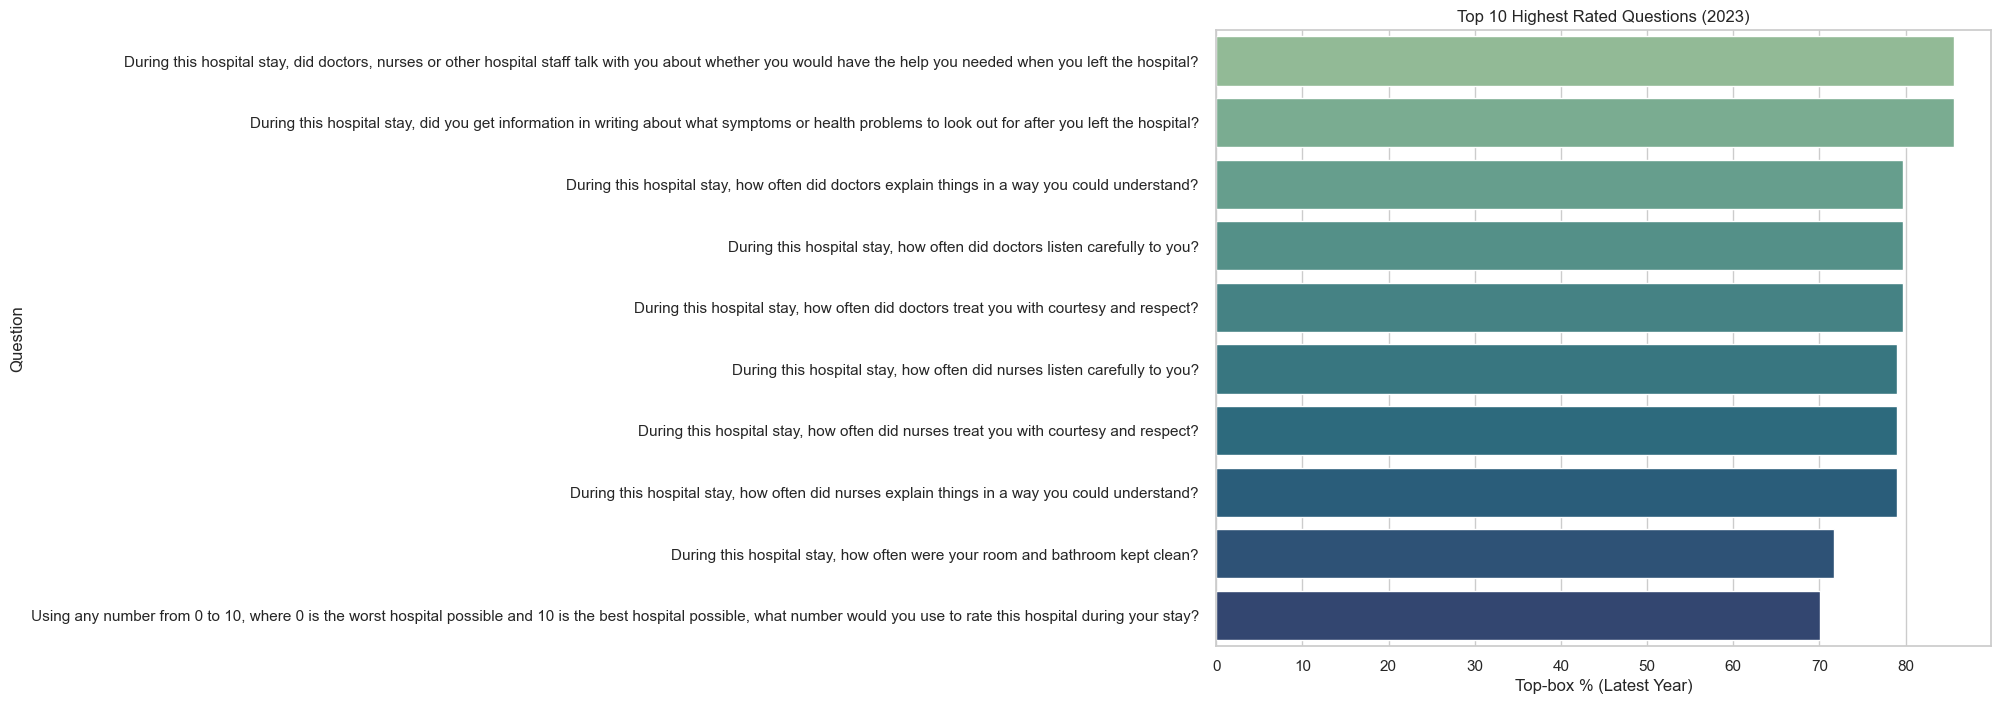

In [103]:

# --------------------------------
# Step 6: Top-performing Questions (Highest Satisfaction)
# --------------------------------
question_pivot['Latest Score'] = question_pivot[latest_year]
top_questions = question_pivot.sort_values('Latest Score', ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(y=top_questions.index, x=top_questions['Latest Score'], palette='crest')
plt.title(f'Top 10 Highest Rated Questions ({latest_year})')
plt.xlabel('Top-box % (Latest Year)')
plt.ylabel('Question')
plt.tight_layout()
plt.show()


C:\Users\17654\AppData\Local\Temp\ipykernel_36940\1661554052.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\17654\AppData\Local\Temp\ipykernel_36940\1661554052.py:12: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



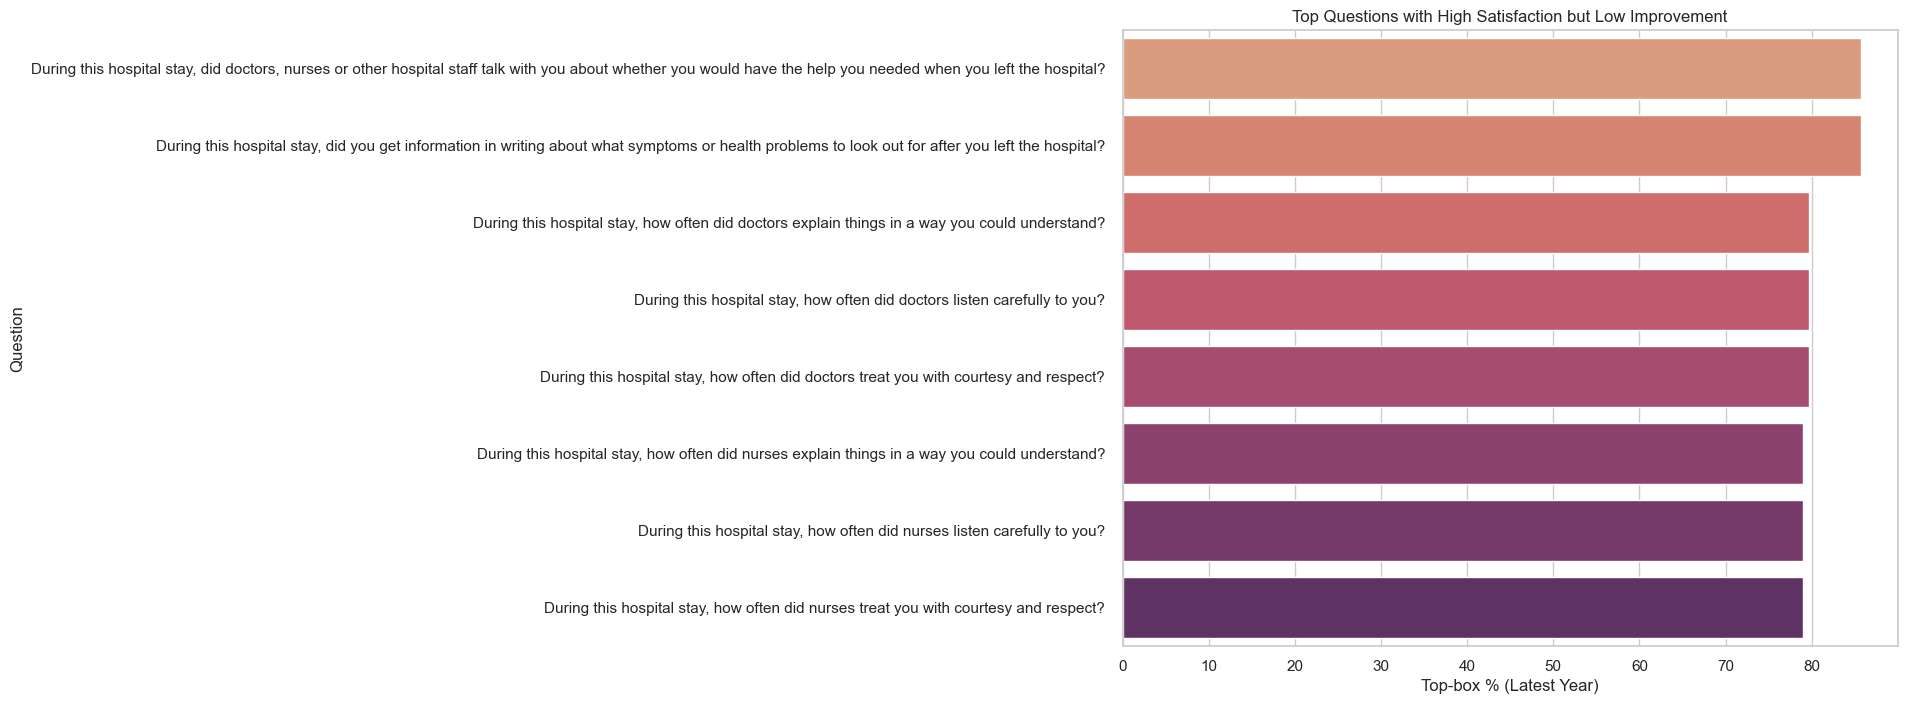

In [105]:
# --------------------------------
# Step 7: High-Scoring but Stagnant Questions
# --------------------------------
stagnant_questions = question_pivot[(question_pivot['Latest Score'] > 75) & (question_pivot['Improvement'] < 2)]
stagnant_questions_sorted = stagnant_questions.sort_values('Latest Score', ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(y=stagnant_questions_sorted.index, x=stagnant_questions_sorted['Latest Score'], palette='flare')
plt.title(f'Top Questions with High Satisfaction but Low Improvement')
plt.xlabel('Top-box % (Latest Year)')
plt.ylabel('Question')
plt.tight_layout()
plt.show()

C:\Users\17654\AppData\Local\Temp\ipykernel_36940\2663356993.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\17654\AppData\Local\Temp\ipykernel_36940\2663356993.py:15: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



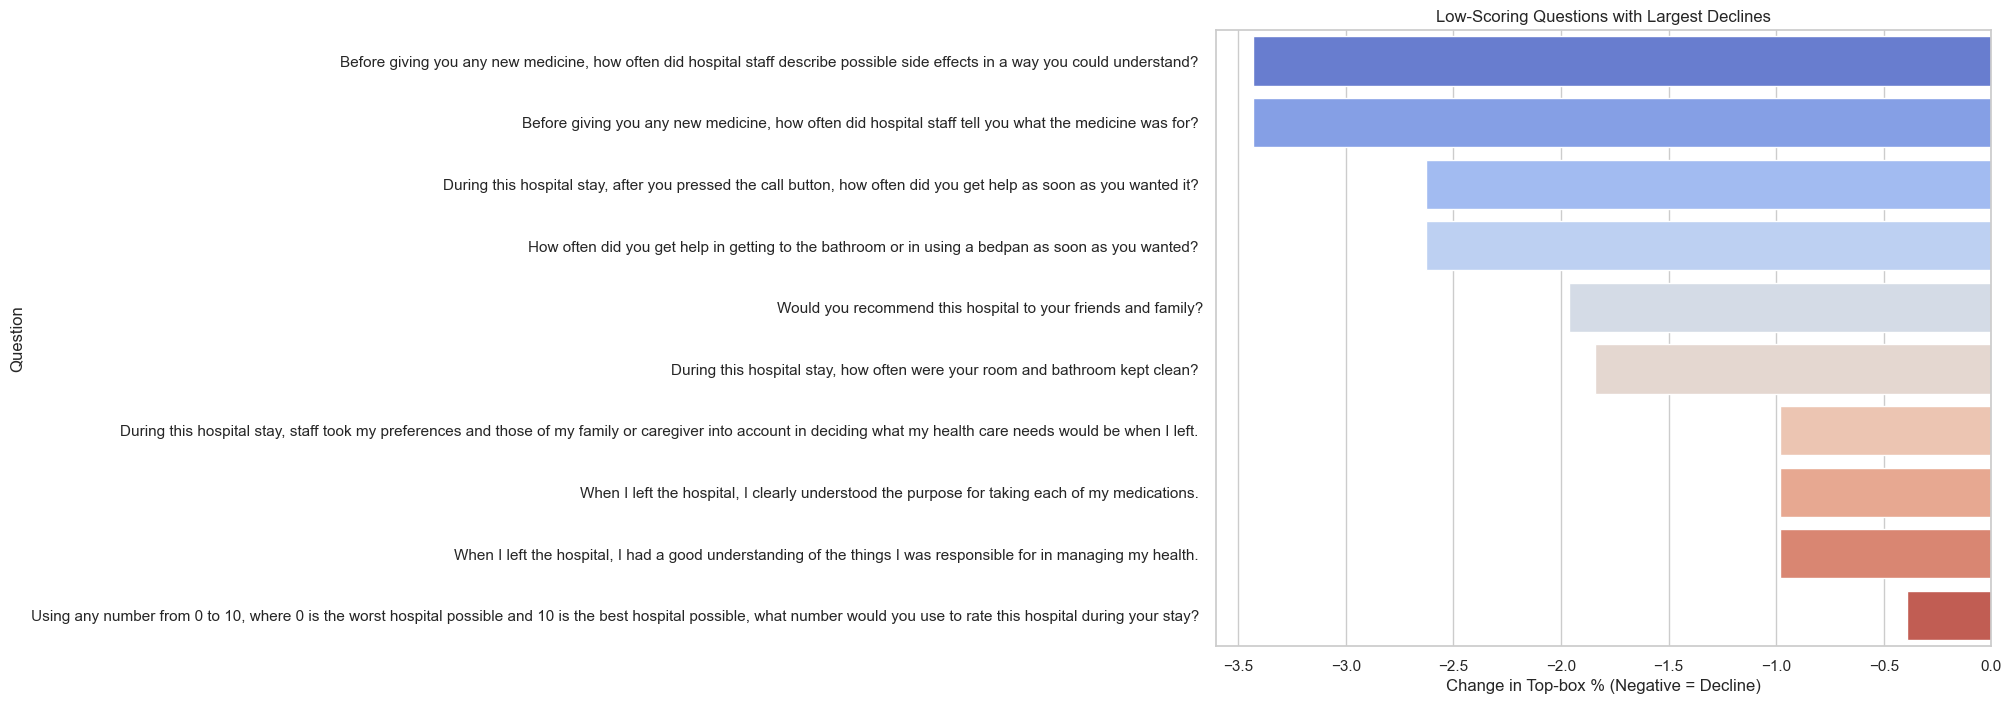

In [137]:
# --------------------------------
# Step 8: Low-Scoring and Most Declined Questions
# --------------------------------
declined_questions = question_pivot[(question_pivot['Latest Score'] < 75) & (question_pivot['Improvement'] < 0)].copy()
declined_questions.reset_index(inplace=True)

if not declined_questions.empty:
    declined_sorted = declined_questions.sort_values('Improvement').head(10)

    plt.figure(figsize=(10, 8))
    sns.barplot(data=declined_sorted, y='Question', x='Improvement', palette='coolwarm')
    plt.title('Low-Scoring Questions with Largest Declines')
    plt.xlabel('Change in Top-box % (Negative = Decline)')
    plt.ylabel('Question')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No low-scoring declining questions found.")


In [135]:
# Preview all questions with their Latest Score and Improvement
preview_df = question_pivot[['Latest Score', 'Improvement']].copy().reset_index()
preview_df = preview_df.sort_values(by='Latest Score')  # or by 'Improvement'

# Display the lowest 15 scoring questions with their improvement
print("🔍 Preview of Questions with Low Scores and Corresponding Improvements:")
display(preview_df.head(15))


🔍 Preview of Questions with Low Scores and Corresponding Improvements:


Year,Question,Latest Score,Improvement
16,"When I left the hospital, I clearly understood...",51.039216,-0.980392
13,"During this hospital stay, staff took my prefe...",51.039216,-0.980392
17,"When I left the hospital, I had a good underst...",51.039216,-0.980392
11,"During this hospital stay, how often was the a...",61.078431,-0.078431
0,"Before giving you any new medicine, how often ...",61.490196,-3.431373
1,"Before giving you any new medicine, how often ...",61.490196,-3.431373
2,"During this hospital stay, after you pressed t...",65.450980,-2.627451
14,How often did you get help in getting to the b...,65.450980,-2.627451
18,Would you recommend this hospital to your frie...,68.980392,-1.960784
15,"Using any number from 0 to 10, where 0 is the ...",70.058824,-0.392157
